**Importing Libraries**

In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [3]:
#Loading the dataset
data = pd.read_csv("/content/marketing_campaign.csv",sep="\t")
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
print("Number of datapoints:", len(data))

Number of datapoints: 2240


**Data Cleaning**

In [5]:
#Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

*Drop the rows that have missing income values*

In [6]:
#To drop NA values
data = data.dropna(subset=['Income'])
print("Number of datapoints after dropping NA values: ", len(data))

Number of datapoints after dropping NA values:  2216


*Next, I am going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.*

In [7]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format='%d-%m-%Y')
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


*Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date*

In [8]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

*Unique Values*

In [9]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


*Developing some new features:*

1.   *Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.*
2.   *Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.*
1.   *Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.*
2.   *Create a feature "Children" to indicate total children in a household that is, kids and teenagers.*
1.   *To get further clarity of household, Creating feature indicating "Family_Size"*
2.  *Create a feature "Is_Parent" to indicate parenthood status*
1.   *Create three categories in the "Education" by simplifying its value counts.*
2.  *Drop some of the redundant features*










In [10]:
#Feature Engineering
#Age of customer today
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)


/tmp/ipython-input-10-2304221926.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]


In [11]:
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  3.054423e+16   
std        0.244950      0.115588     0.096907     0.357417  1.749036e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  1.555200e+16   
50%        0.000000      0.000000     0.000000     0.000000  3.071520e+16   
75%        0.000000      0.000000     0.000000     0.000000  4.570560e+16   
max        1.000000      1.000000     1.000000     1.000000  6.039360e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     52.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      25.000000     5.000000     0.000000     1.000000     0.000000  
25%      44.000000    69.000000     0.000000     2.000000     0.000000  
50%      51.000000   396.500000     1.000000     3.000000     1.000000  
75%      62.000000  1048.000000     1.000000     3.000000     1.000000  
max     128.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

*The above stats show some discrepancies in mean Income and Age and max Income and age.*

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

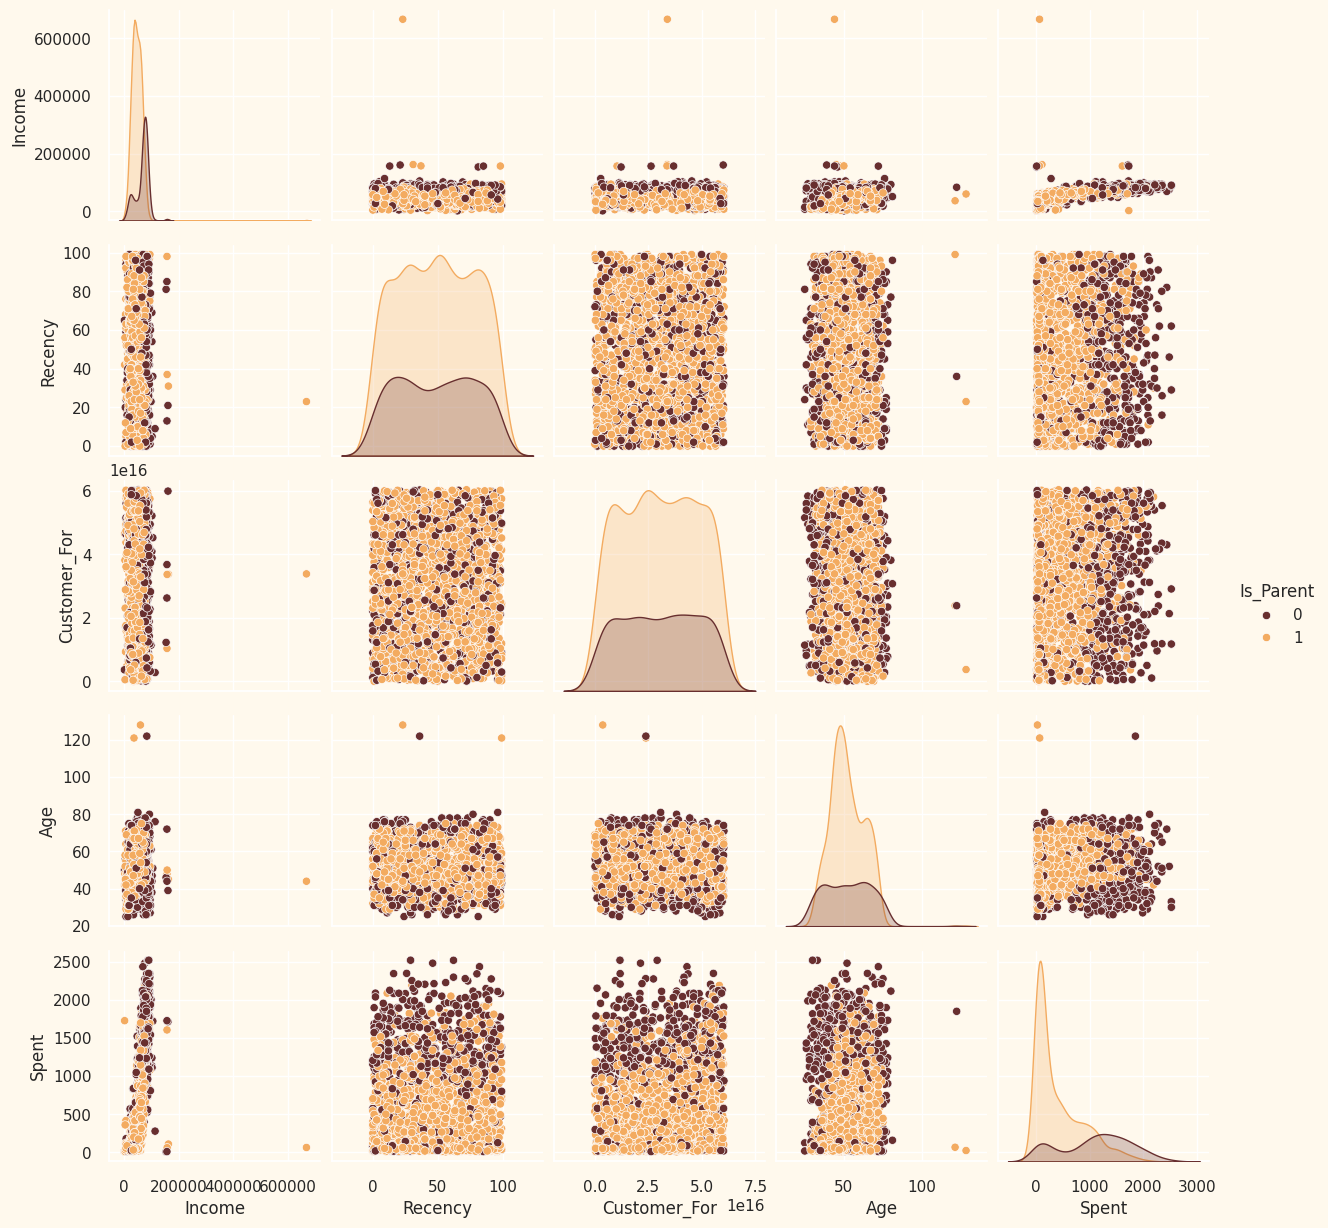

In [12]:
#To plot some selected features
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.show()


*There are a few outliers in the Income and Age features. I will be deleting the outliers in the data.*

In [13]:
#Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


*Looking at the correlation amongst the features. (Excluding the categorical attributes at this point)*

<Axes: >

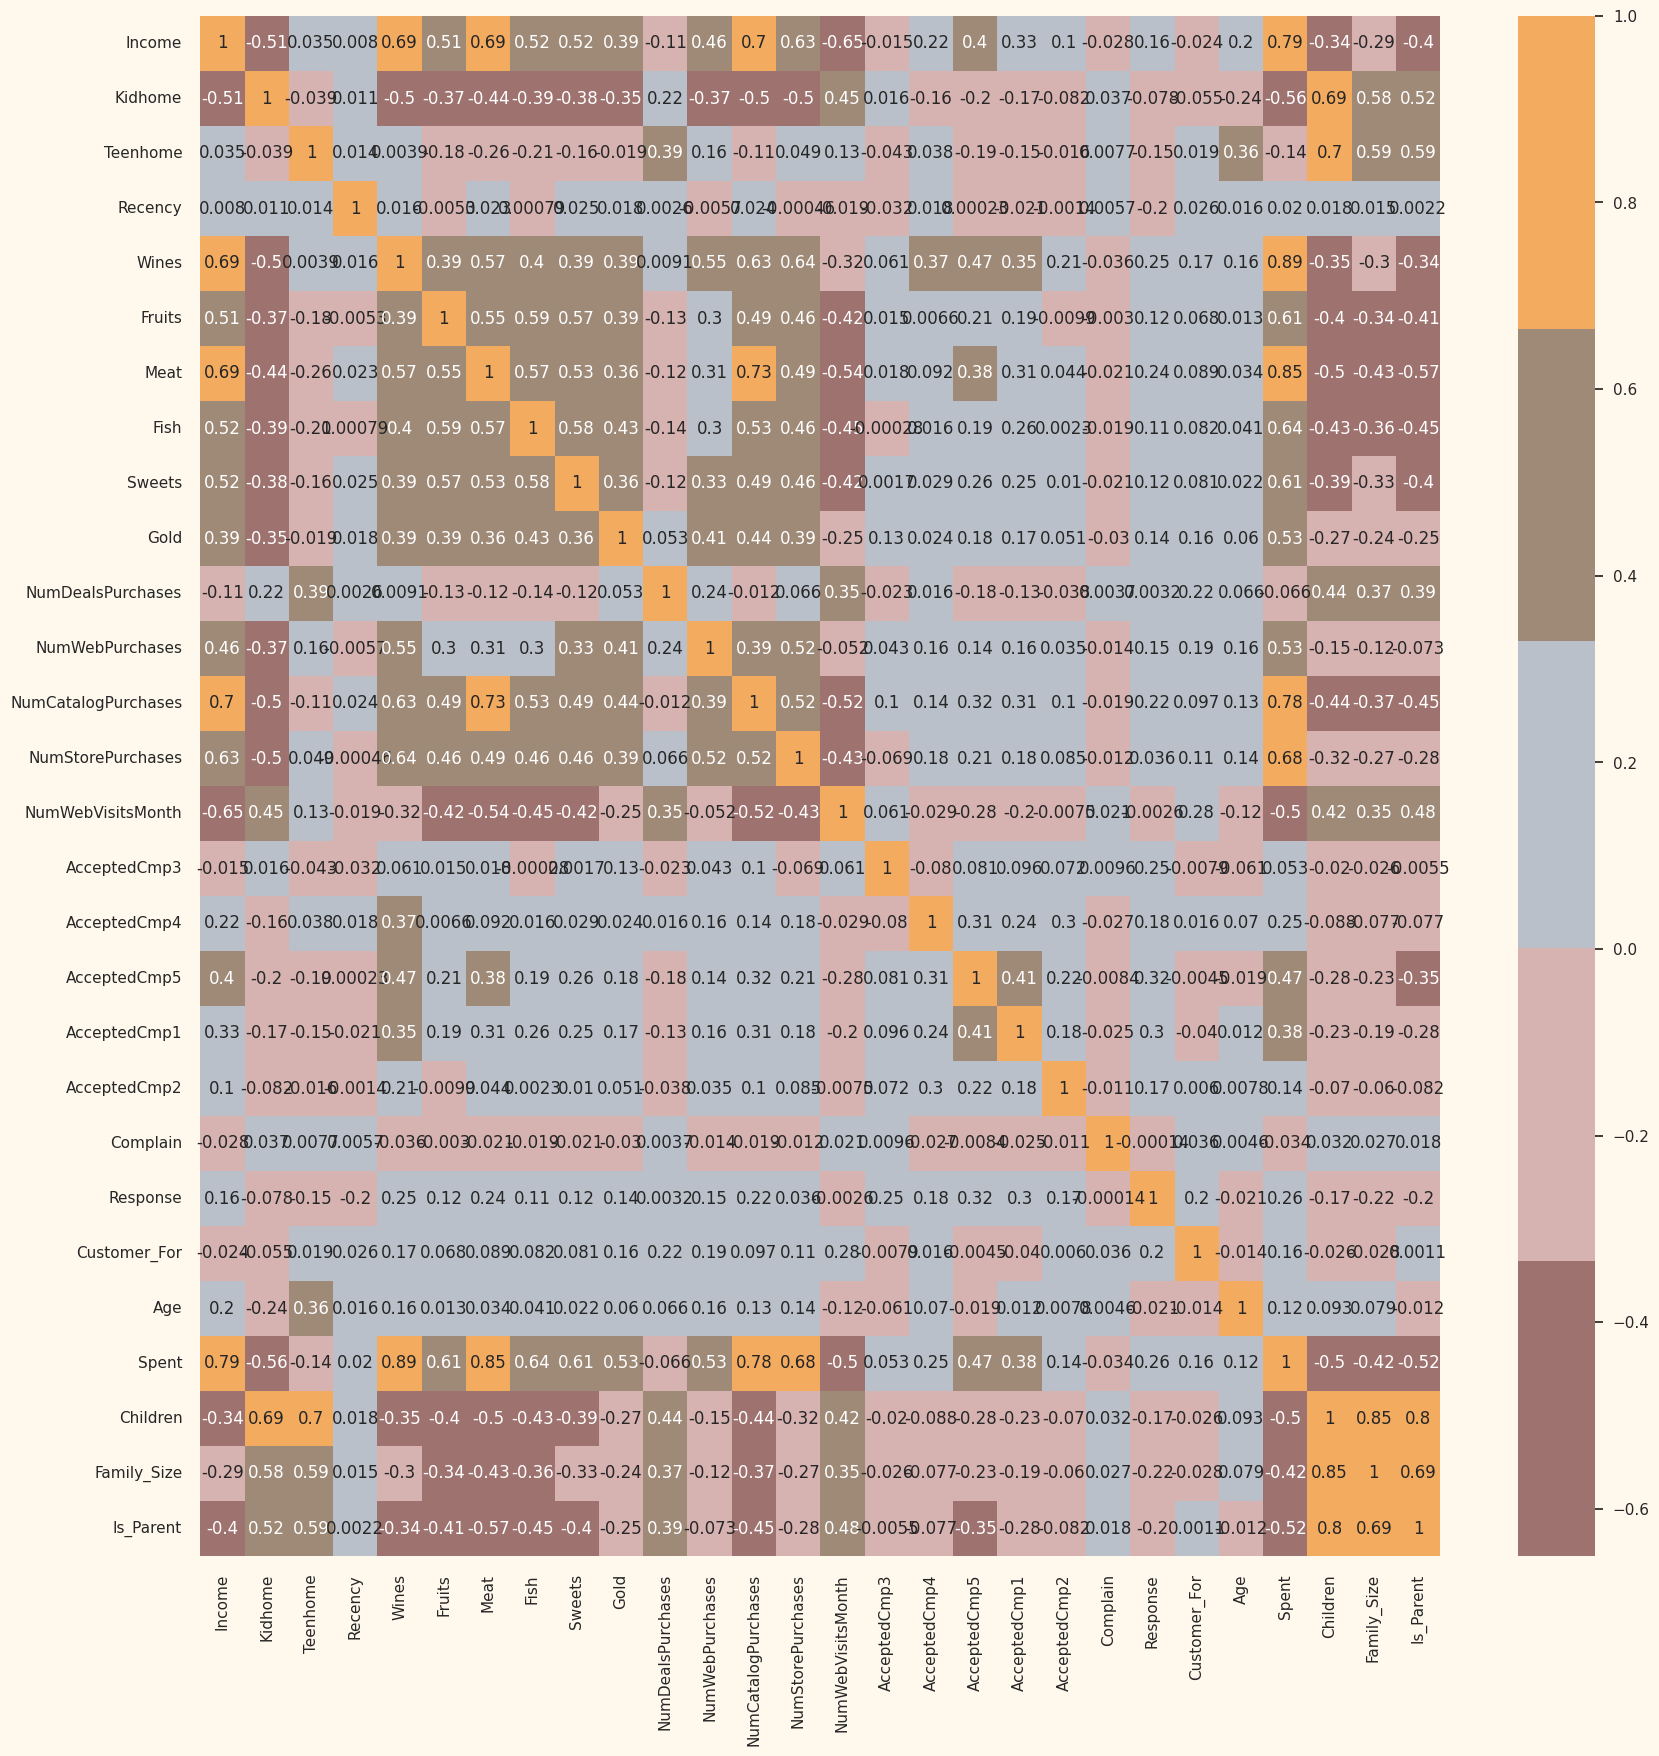

In [14]:
#correlation matrix
corrmat = data.select_dtypes(include=np.number).corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

**Data Preprocessing**

*Steps applied to preprocess the data:*

1.   *Label encoding the categorical features*
2.   *Scaling the features using the standard scaler*
1.   *Creating a subset dataframe for dimensionality reduction*







In [15]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [16]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [17]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [18]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age     Spent  Living_With  Children  \
0           0.692181      1.527721  1.018352  1.676245    -1.349603 -1.264598   
1          -0.132545     -1.189011  1.274785 -0.963297    -1.349603  1.404572   
2          -0.544908     -0.206048  0.334530  0.280110     0.740959 -1.264598   
3           0.279818     -1.060584 -1.289547 -0.920135     0.740959  0.069987   
4          -0.132545     -0.951915 -1.033114 -0.307562     0.740959  0.069987   

   Family_Size  Is_Parent  
0    -1.758359  -1.581139  
1     0.449070   0.632456  
2    -0.654644  -1.581139  
3     0.449070   0.632456  
4     0.449070   0.632456  

[5 rows x 23 columns]

***Dimentionality Reduction***

***In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables***

*Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.*

*Steps in this section:*
1.   *Dimensionality reduction with PC*
2.   *Plotting the reduced dataframe*



***Dimensionality reduction with PCA.***

In [19]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  5.781993e-17  2.878602 -5.978124 -2.539470 -0.781595  2.386380   
col2  2212.0  6.424437e-17  1.709469 -4.194757 -1.323929 -0.173721  1.234851   
col3  2212.0  1.244735e-17  1.231687 -3.625248 -0.853713 -0.050842  0.863974   

           max  
col1  7.452915  
col2  6.168189  
col3  6.750458

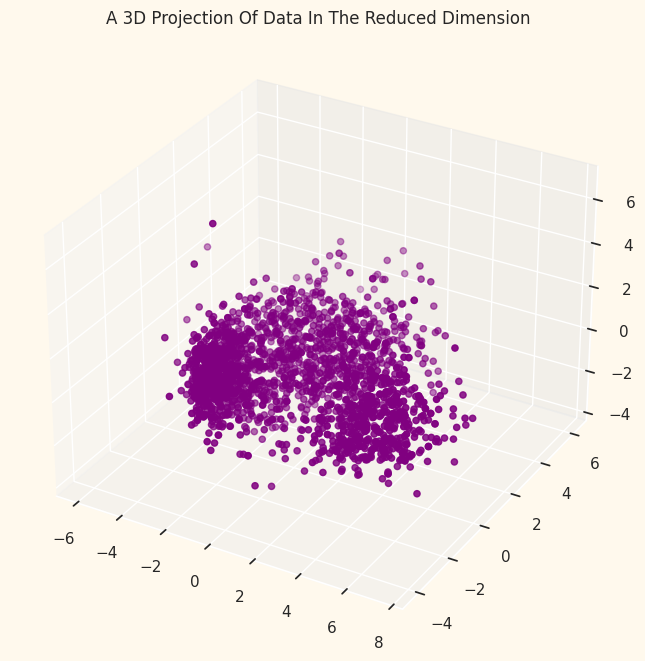

In [20]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="purple", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

***Clustering***

*Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.*

*Steps involved in the Clustering:*

1.   *Elbow Method to determine the number of clusters to be formed*
2.   *Clustering via Agglomerative Clustering*
1.   *Examining the clusters formed via scatter plot*






Elbow Method to determine the number of clusters to be formed:


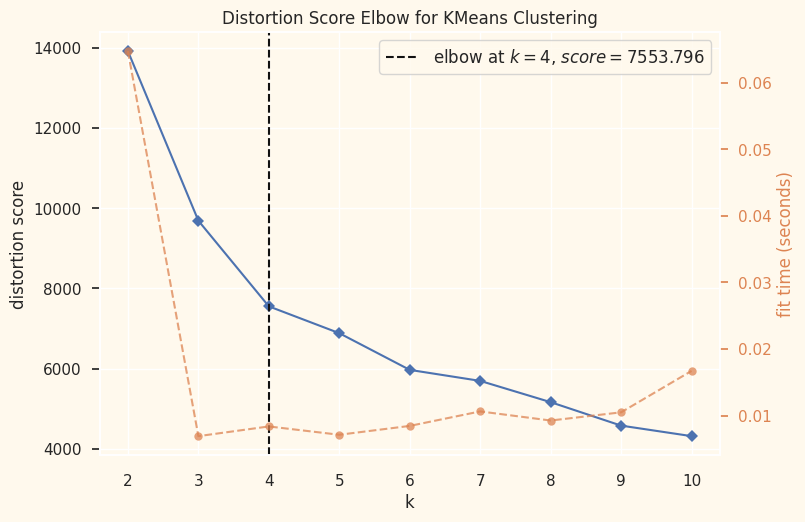

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

*The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.*

In [22]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

*To examine the clusters formed let's have a look at the 3-D distribution of the clusters.*



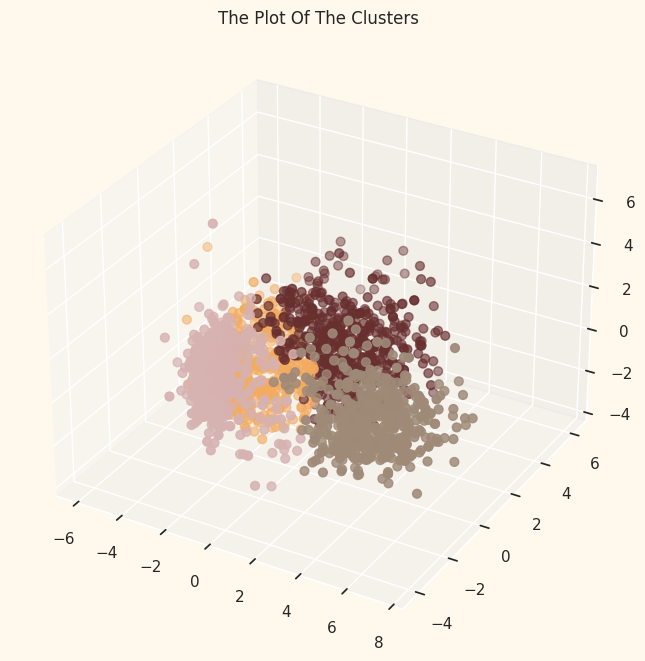

In [23]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

***Evaluation Models***

*Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.*

*For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.*

/tmp/ipython-input-24-1859745431.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters"], palette= pal)


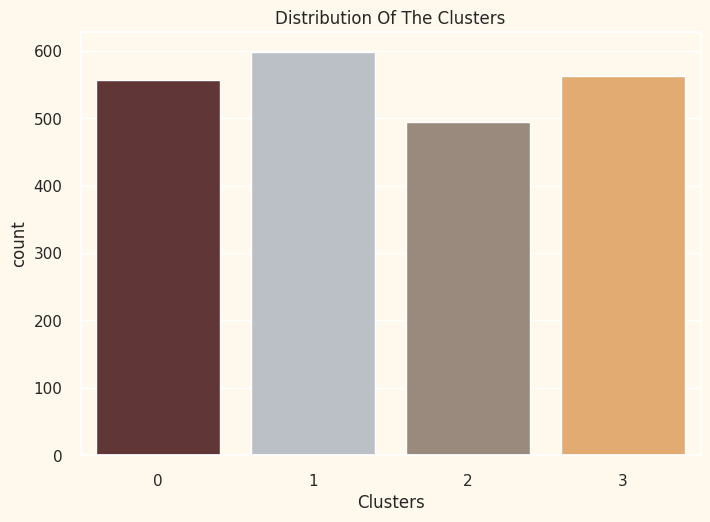

In [24]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

*The clusters seem to be fairly distributed.*

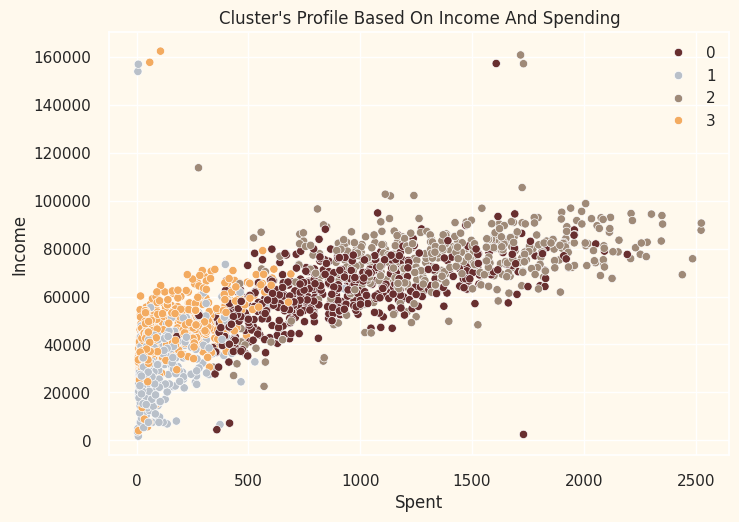

In [25]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

*Income vs spending plot shows the clusters pattern:*


1.   *group 0: high spending & average income*
2.   *group 1: high spending & high income*
1.   group 2: low spending & low income
2.   group 3: high spending & low income

*Next, we will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold*

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipython-input-26-547382256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
/usr/local/lib/python3.11/dist-packages/seaborn

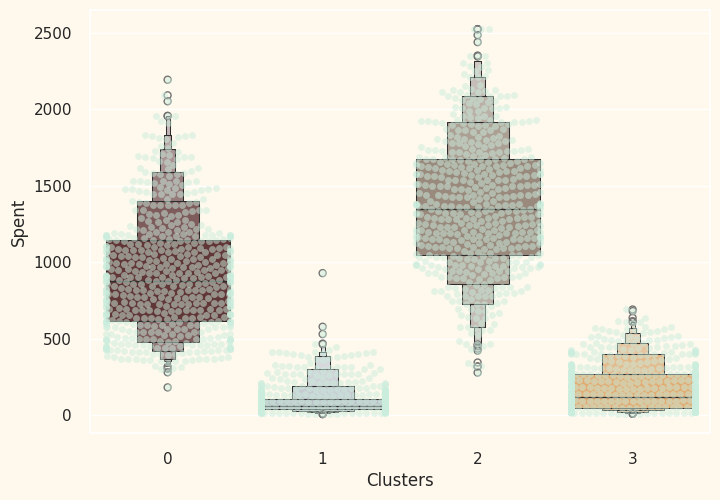

In [26]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

*From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.*

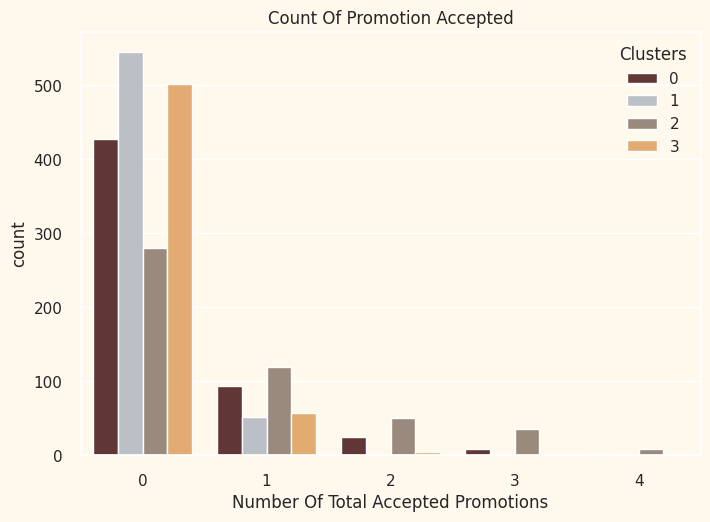

In [28]:
#Creating a feature to get a sum of accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

*There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.*

/tmp/ipython-input-29-2174481357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)


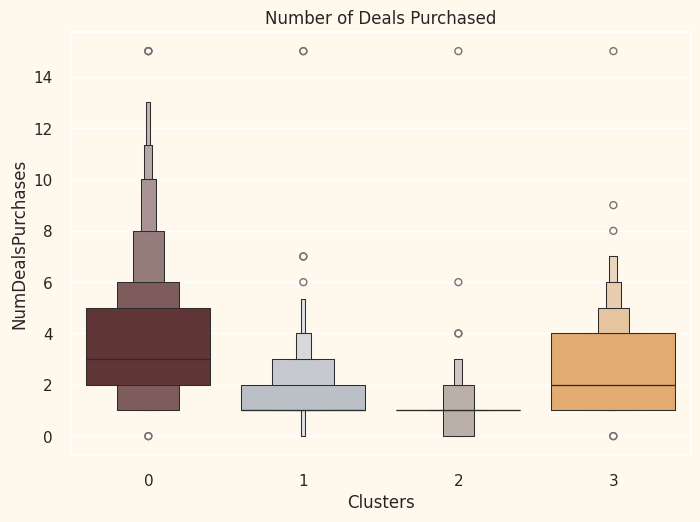

In [29]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

*Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 3. However, our star customers cluster 1 are not much into the deals. Nothing seems to attract cluster 2 overwhelmingly*

***Profiling***

*Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.*

*To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions.*

<Figure size 800x550 with 0 Axes>

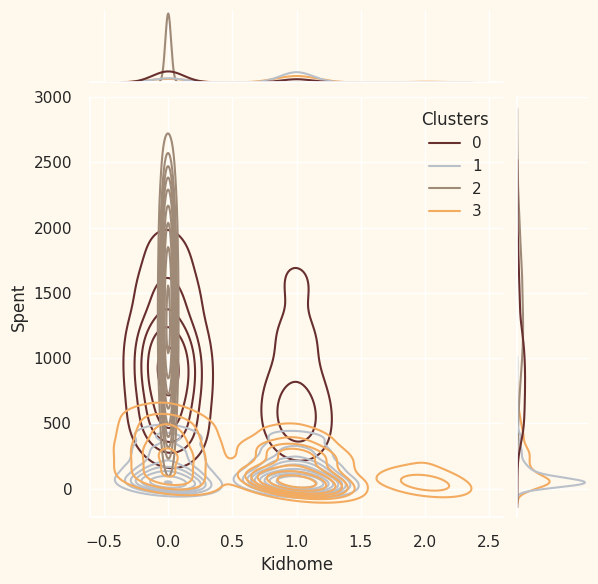

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

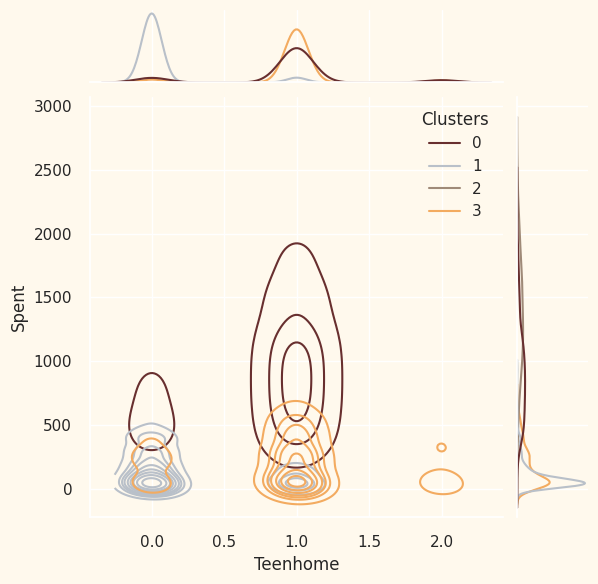

<Figure size 800x550 with 0 Axes>

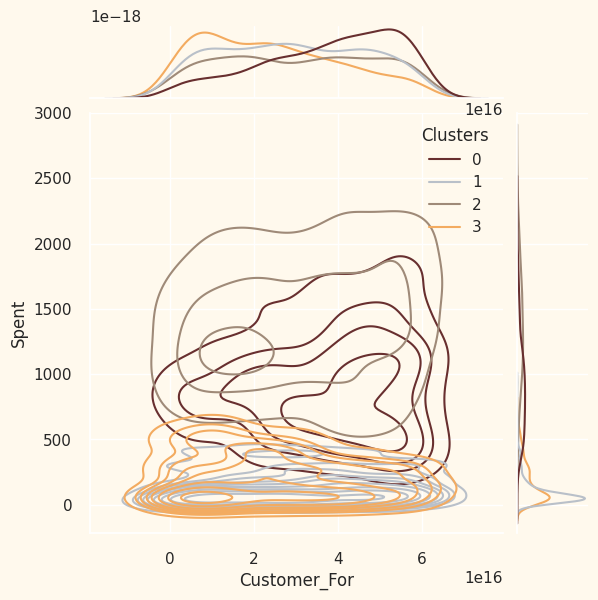

<Figure size 800x550 with 0 Axes>

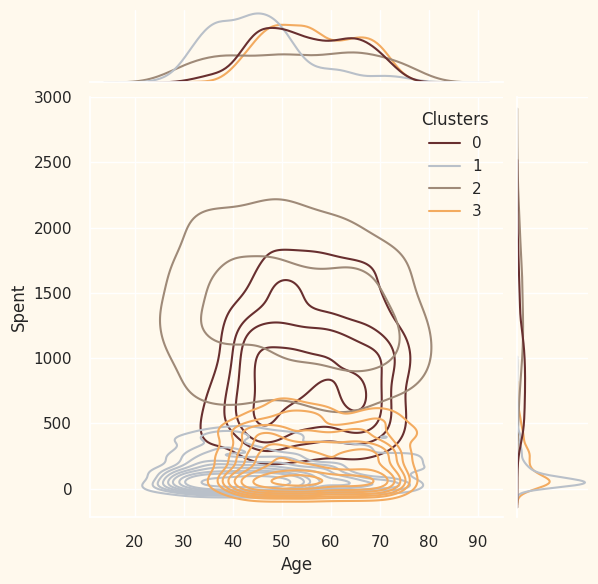

<Figure size 800x550 with 0 Axes>

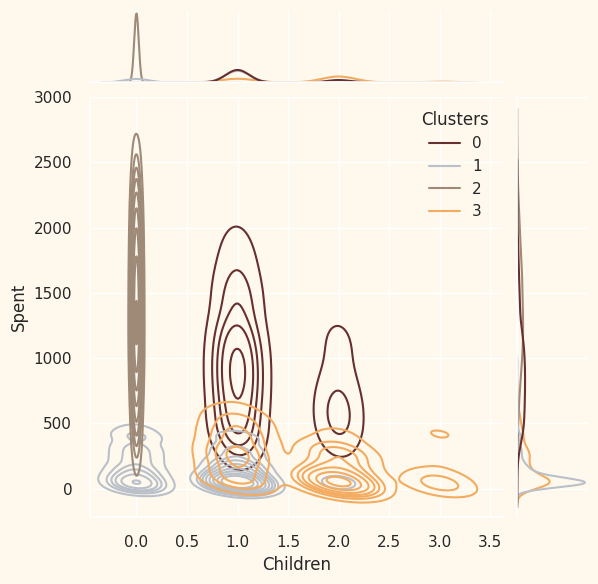

<Figure size 800x550 with 0 Axes>

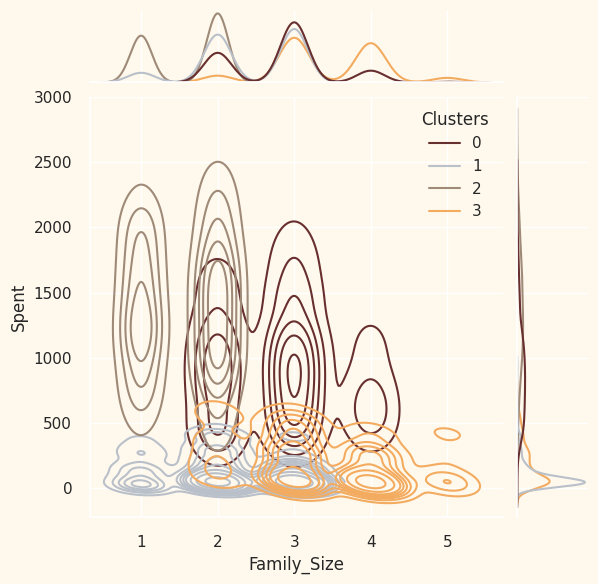

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

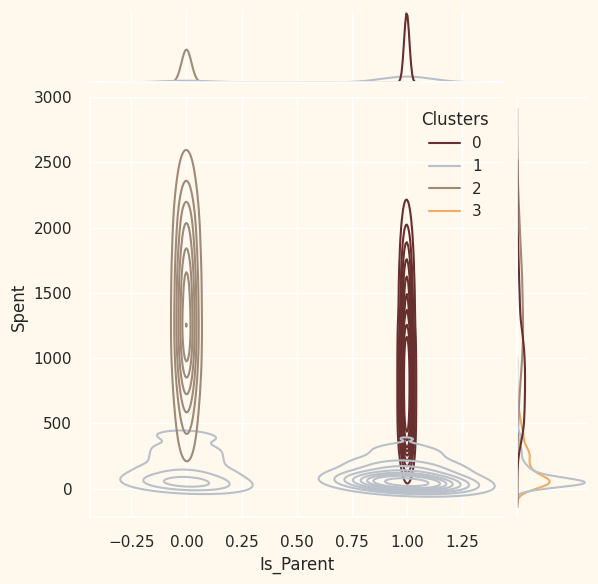

<Figure size 800x550 with 0 Axes>

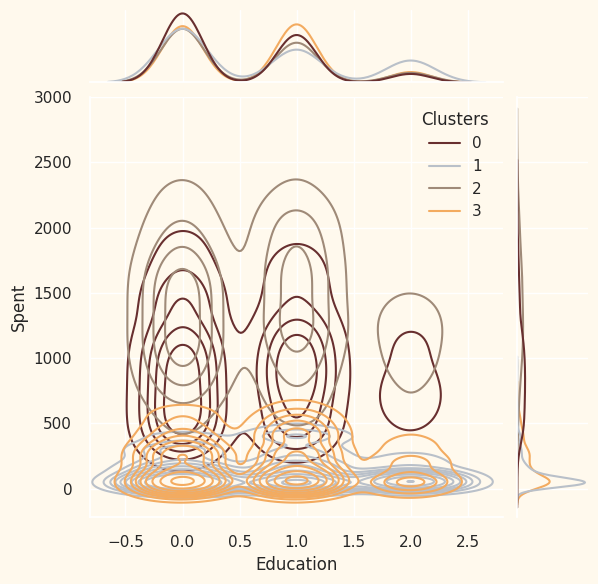

<Figure size 800x550 with 0 Axes>

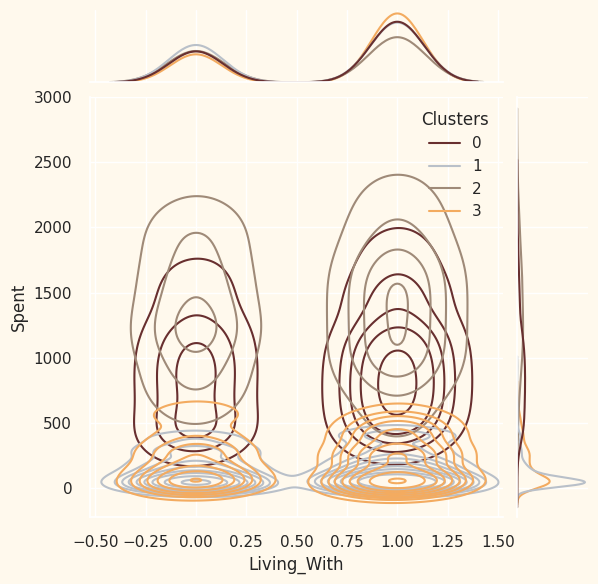

In [30]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

*About Cluster Number: 0*
1.   *Are definitely a parent*
1.   *At the max have 4 members in the family and at least 2*
2.   *Single parents are a subset of this group*
2.   *Most have a teenager at home*
1.   *Relatively older*

*About Cluster Number: 1*
1.   *Are definitely not a parent*
1.   *At the max are only 2 members in the family*
1.   *A slight majority of couples over single people*
2.   *Span all ages*
2.   *A high-income group*


*About Cluster Number: 2*
1.   *The majority of these people are parents*
1.   *At the max are 3 members in the family*
2.   *They majorly have one kid (and not teenagers, typically)*
2.   *Relatively younger*

*About Cluster Number: 3*
1.   *They are definitely a parent*
2.   *At the max are 5 members in the family and at least 2*
1.   *Majority of them have a teenager at home*
2.   *Relatively older*
1.   *A lower-income group*






*In this project, I performed unsupervised clustering. I did use dimensionality reduction followed by agglomerative clustering. I came up with 4 clusters and further used them in profiling customers in clusters according to their family structures and income/spending. This can be used in planning better marketing strategies.*

***RFM (Recency (R), Frequency (F), and Monetary value (M)) Analysis***



Customer count by RFM Segment:
RFM_Segment
Low          341
Medium       797
High         728
Very High    346
Name: count, dtype: int64


/tmp/ipython-input-35-525542862.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RFM_Segment', data=data, palette='pastel', order=['Low', 'Medium', 'High', 'Very High'])


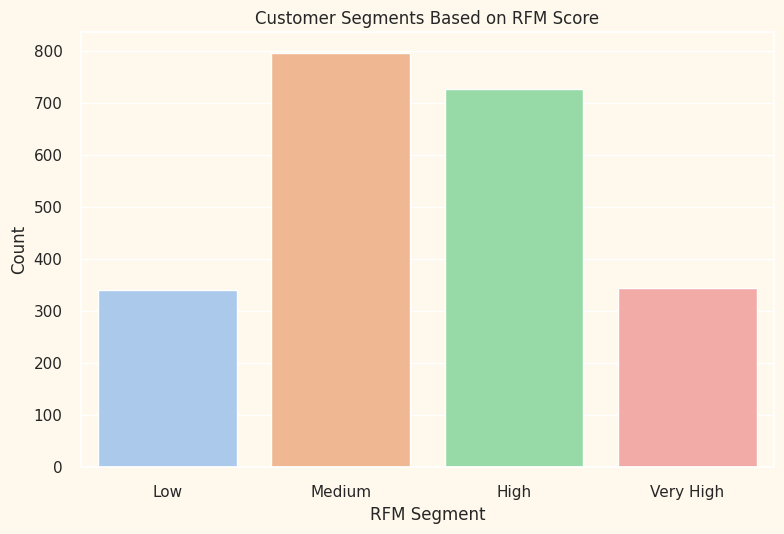

In [35]:
# --- RFM Analysis (Using existing 'Age', 'Spent', 'Customer_For') ---

# Recency: Use existing 'Customer_For'
data['Recency'] = data['Customer_For']

# Frequency: Total number of campaign acceptances
data['Frequency'] = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

# Monetary: Use 'Spent' (already defined)

# Assign RFM Scores
data['R'] = pd.qcut(data['Recency'], 4, labels=[4, 3, 2, 1]).astype(int)
data['F'] = pd.qcut(data['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4]).astype(int)
data['M'] = pd.qcut(data['Spent'], 4, labels=[1, 2, 3, 4]).astype(int)

# Total RFM Score
data['RFM_Score'] = data['R'] + data['F'] + data['M']

# Customer Segments
data['RFM_Segment'] = pd.cut(
    data['RFM_Score'],
    bins=[2, 5, 7, 9, 12],
    labels=['Low', 'Medium', 'High', 'Very High']
)

# Segment Summary
print("Customer count by RFM Segment:")
print(data['RFM_Segment'].value_counts().sort_index())

# Optional Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='RFM_Segment', data=data, palette='pastel', order=['Low', 'Medium', 'High', 'Very High'])
plt.title('Customer Segments Based on RFM Score')
plt.xlabel('RFM Segment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


*Interpretation:*
1.   *Low: Customers who either haven’t spent much, responded infrequently, or joined long ago — may be at risk of churn.*
1.   *Medium: Average-value customers — potential to grow.*
2.   *High: Engaged customers with high spend or frequency.*
1.   *Very High: Top-tier customers — highly engaged, recent, and profitable.*

/tmp/ipython-input-36-3085696496.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_profile = data.groupby('RFM_Segment')[['Income', 'Spent', 'Age', 'Frequency']].mean().round(2)


Average Metrics by RFM Segment:
               Income    Spent    Age  Frequency
RFM_Segment                                     
Low          35450.38   173.15  50.11       0.00
Medium       44746.94   386.66  51.21       0.10
High         57105.91   728.05  53.29       0.54
Very High    74011.24  1289.15  53.53       1.51


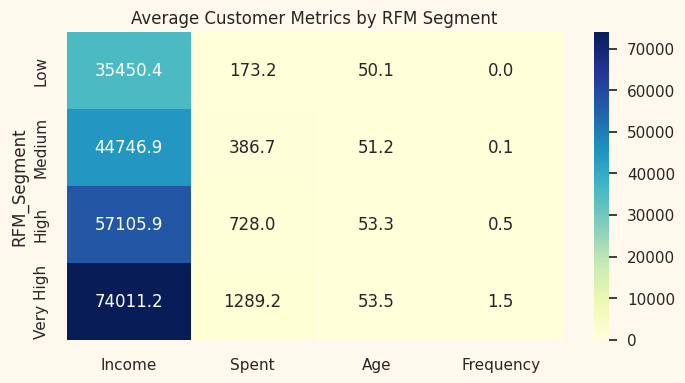

In [36]:
# Segment Profiling
rfm_profile = data.groupby('RFM_Segment')[['Income', 'Spent', 'Age', 'Frequency']].mean().round(2)
print("Average Metrics by RFM Segment:")
print(rfm_profile)

# Optional: Heatmap for quick view
plt.figure(figsize=(8, 4))
sns.heatmap(rfm_profile, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title("Average Customer Metrics by RFM Segment")
plt.show()

*Campaign Effectiveness Analysis: Understanding which campaigns were most successful and how responders differ from non-responders*


/tmp/ipython-input-37-3183237009.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acceptance_rates.index, y=acceptance_rates.values, palette='viridis')


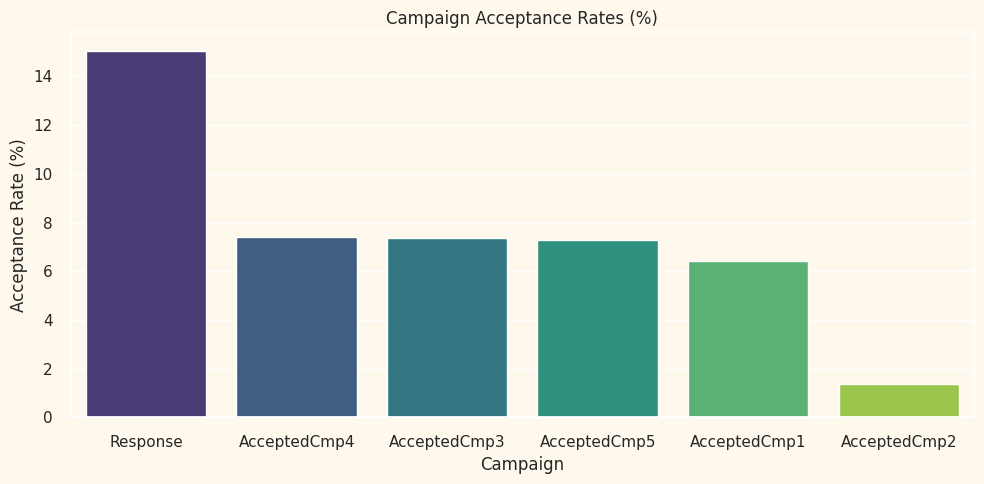

In [37]:
# Campaign acceptance rate (%)
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
acceptance_rates = data[campaigns].mean().sort_values(ascending=False) * 100

# Bar plot of acceptance rates
plt.figure(figsize=(10, 5))
sns.barplot(x=acceptance_rates.index, y=acceptance_rates.values, palette='viridis')
plt.title("Campaign Acceptance Rates (%)")
plt.ylabel("Acceptance Rate (%)")
plt.xlabel("Campaign")
plt.tight_layout()
plt.show()


1.   Overall Response Rate: ~15%
1.   Top Performing Campaigns: AcceptedCmp4, AcceptedCmp3, AcceptedCmp5
2.   Lowest Performing: AcceptedCmp2 (~1%)


*Profile Campaign Responders vs. Non-Responders*

In [38]:
responders = data[data['Response'] == 1]
non_responders = data[data['Response'] == 0]

# Compare profile
comparison = pd.DataFrame({
    'Avg Income': [responders['Income'].mean(), non_responders['Income'].mean()],
    'Avg Spend': [responders['Spent'].mean(), non_responders['Spent'].mean()],
    'Avg Age': [responders['Age'].mean(), non_responders['Age'].mean()],
    'Avg Family Size': [responders['Family_Size'].mean(), non_responders['Family_Size'].mean()]
}, index=['Responders', 'Non-Responders'])

comparison.round(2)


Avg Income  Avg Spend  Avg Age  Avg Family Size
Responders        60209.68     985.66    51.50             2.12
Non-Responders    50496.58     540.21    52.19             2.68

*Helps identify who responded best — e.g., maybe they’re younger, higher-income, or have smaller households — and guide segmentation or personalization.*

***Income vs Spending Behavior***


*Analyze whether high-income customers actually spend more — and on what products.*

/tmp/ipython-input-39-1381218171.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_product_spend = data.groupby('Income_Bracket')[product_cols].mean().round(2)


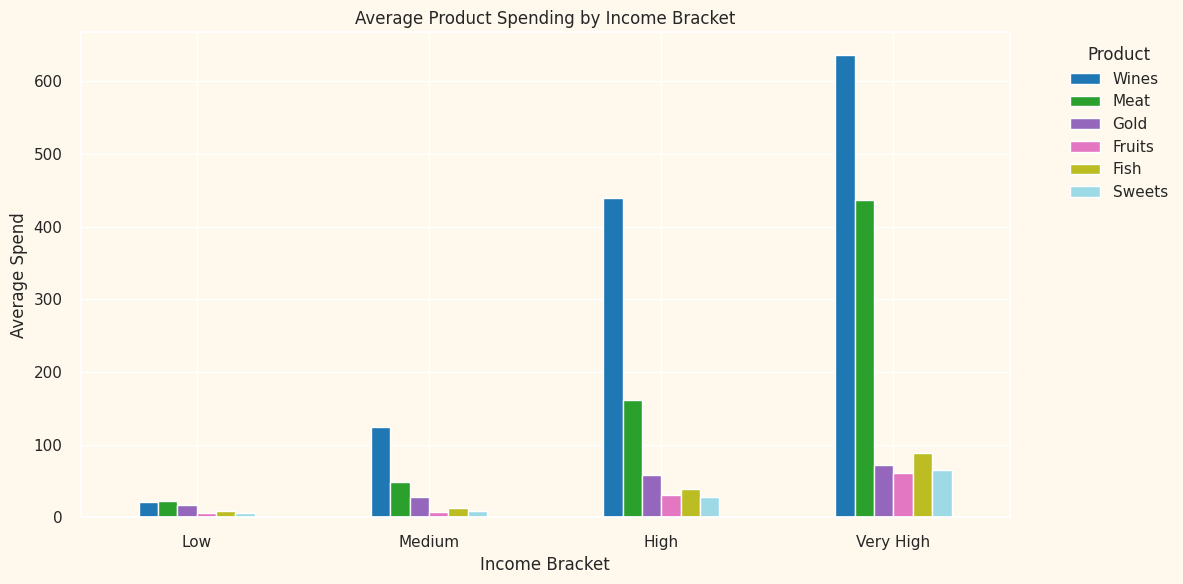

In [39]:
# Create income brackets (quartiles)
data['Income_Bracket'] = pd.qcut(data['Income'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Average spending on each product category per income group
product_cols = ['Wines', 'Meat', 'Gold', 'Fruits', 'Fish', 'Sweets']
avg_product_spend = data.groupby('Income_Bracket')[product_cols].mean().round(2)

# Bar plot: average spend by income group
avg_product_spend.plot(kind='bar', figsize=(12, 6), colormap='tab20')
plt.title("Average Product Spending by Income Bracket")
plt.ylabel("Average Spend")
plt.xlabel("Income Bracket")
plt.xticks(rotation=0)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


*Higher income brackets significantly prefer Wines and Meat, suggesting premium and gourmet product positioning could resonate well. Lower-income segments show relatively uniform spending behavior, indicating a value-driven market.*

***Channel Preference Clustering***

Average Channel Use per Cluster:


NumWebPurchases  NumStorePurchases  NumCatalogPurchases
Channel_Cluster                                                         
0                           4.62               8.78                 6.58
1                           2.12               3.35                 0.66
2                           7.22               7.61                 2.82

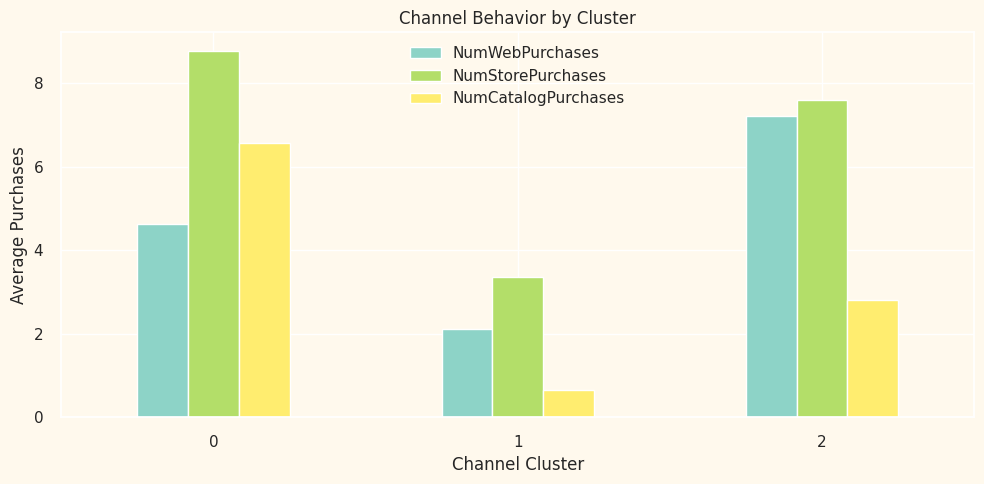

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Channel-based features
channel_features = ['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']

# Normalize
scaler = StandardScaler()
channel_scaled = scaler.fit_transform(data[channel_features])

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Channel_Cluster'] = kmeans.fit_predict(channel_scaled)

# Analyze clusters
channel_profiles = data.groupby('Channel_Cluster')[channel_features].mean().round(2)
print("Average Channel Use per Cluster:")
display(channel_profiles)

# Optional: Visualization
channel_profiles.plot(kind='bar', figsize=(10, 5), colormap='Set3')
plt.title("Channel Behavior by Cluster")
plt.ylabel("Average Purchases")
plt.xlabel("Channel Cluster")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


*Interpretation:*
*   0 - Store-heavy + Catalog-heavy buyers (Avg. 8.8 store, 6.6 catalog) – Traditional shoppers
*   1 - Low-engagement segment – low across all channels; possibly new or inactive
*   2	- Digital-savvy omnichannel users — high in web and store, some catalog.

*Recommendations:*
*   *Cluster 0 could be targeted with offline promotions or personalized catalogs.*
*   *Cluster 1 might need reactivation campaigns or better onboarding flow.*
*   *Cluster 2 may respond better to digital campaigns or bundled online+in-store offers.*



***Time-Based Tenure Analysis***

/tmp/ipython-input-41-2064400905.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Tenure_Bucket', y='Spent', palette='coolwarm')


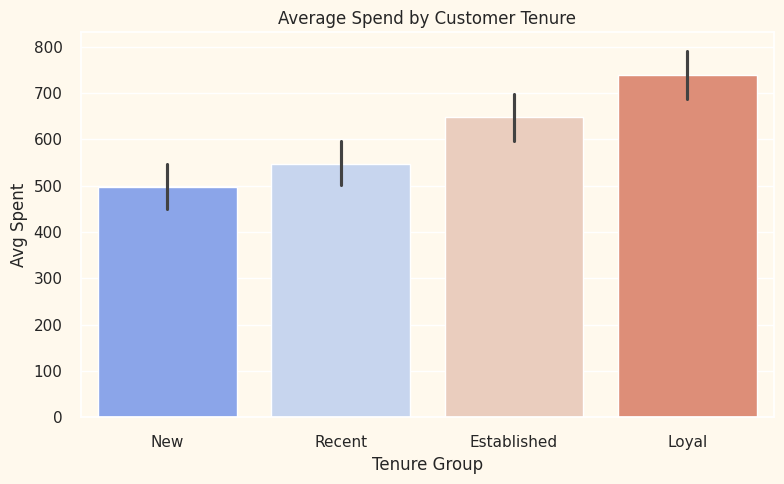

Campaign Response Rate by Tenure Bucket (%):
Tenure_Bucket
New             8.65
Recent          9.57
Established    15.73
Loyal          26.36
Name: Response, dtype: float64


/tmp/ipython-input-41-2064400905.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_response = data.groupby('Tenure_Bucket')['Response'].mean().multiply(100).round(2)


In [41]:
# Create tenure quartiles
data['Tenure_Bucket'] = pd.qcut(data['Customer_For'], 4, labels=['New', 'Recent', 'Established', 'Loyal'])

# Average spend across tenure buckets
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Tenure_Bucket', y='Spent', palette='coolwarm')
plt.title("Average Spend by Customer Tenure")
plt.ylabel("Avg Spent")
plt.xlabel("Tenure Group")
plt.tight_layout()
plt.show()

# Optional: Add campaign response rate by tenure
tenure_response = data.groupby('Tenure_Bucket')['Response'].mean().multiply(100).round(2)
print("Campaign Response Rate by Tenure Bucket (%):")
print(tenure_response)


*Tenure is positively correlated with spend, highlighting the value of nurturing long-term customer relationships. Upsell and exclusive reward programs may perform best with established and loyal segments.*

***Predictive Modeling (Classification)***

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Features (you can tweak this list)
features = ['Age', 'Income', 'Spent', 'Children', 'Family_Size',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
X = data[features]
y = data['Response']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       553
           1       0.67      0.22      0.33       111

    accuracy                           0.85       664
   macro avg       0.76      0.60      0.62       664
weighted avg       0.83      0.85      0.82       664

Confusion Matrix:
[[541  12]
 [ 87  24]]


*This looks like a class imbalance problem:*
*   *Overall accuracy: 85% — sounds good, but it's misleading.*
*   *Issue: Model is good at predicting non-responders (Class 0) but fails to capture responders (Class 1).*
*   *Recall for Class 1 is only 22%, meaning it misses most of the customers who actually respond.*





***Handling Class Imbalance with class_weight='balanced' in Random Forest***

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Reuse train-test split
clf_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf_balanced.fit(X_train, y_train)
y_pred_balanced = clf_balanced.predict(X_test)

# Evaluation
print("Random Forest (Balanced Weights) Report:")
print(classification_report(y_test, y_pred_balanced))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_balanced))


Random Forest (Balanced Weights) Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       553
           1       0.61      0.20      0.30       111

    accuracy                           0.84       664
   macro avg       0.73      0.59      0.61       664
weighted avg       0.82      0.84      0.81       664

Confusion Matrix:
[[539  14]
 [ 89  22]]


***Logistic Regression for Interpretability***

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       553
           1       0.32      0.51      0.39       111

    accuracy                           0.73       664
   macro avg       0.60      0.65      0.61       664
weighted avg       0.79      0.73      0.76       664

Confusion Matrix:
[[430 123]
 [ 54  57]]


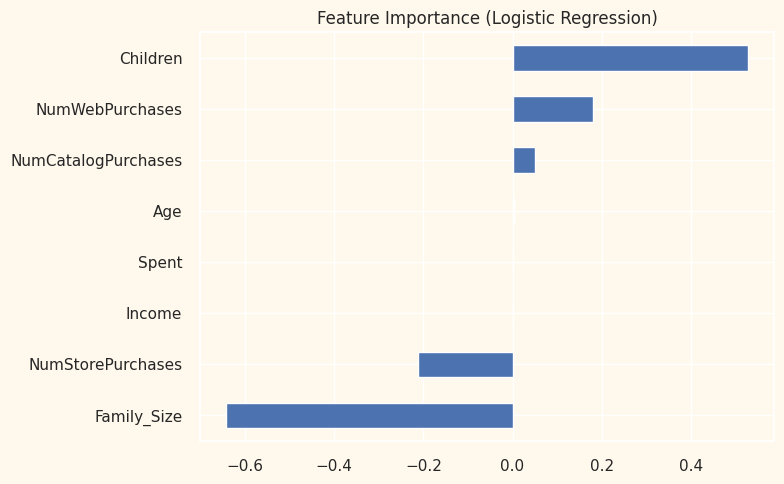

In [44]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression with class weighting
log_clf = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
log_clf.fit(X_train, y_train)
y_pred_log = log_clf.predict(X_test)

# Evaluation
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

# Optional: Coefficients for feature importance
coefficients = pd.Series(log_clf.coef_[0], index=features).sort_values()
coefficients.plot(kind='barh', figsize=(8, 5), title='Feature Importance (Logistic Regression)')
plt.tight_layout()
plt.show()


*Feature - Impact - Interpretation*
Children
*   *Children - ↑ Strong positive - More children increases likelihood of campaign response. Possibly family-centric offers.*
*   *NumWebPurchases - ↑ Moderate positive -	More online activity → more responsive to campaigns.*
*   *Family_Size - ↓ Strong negative - Larger families may be less responsive (budget-conscious, overwhelmed?).*


***Final Visualizations***

*Correlation Heatmap*

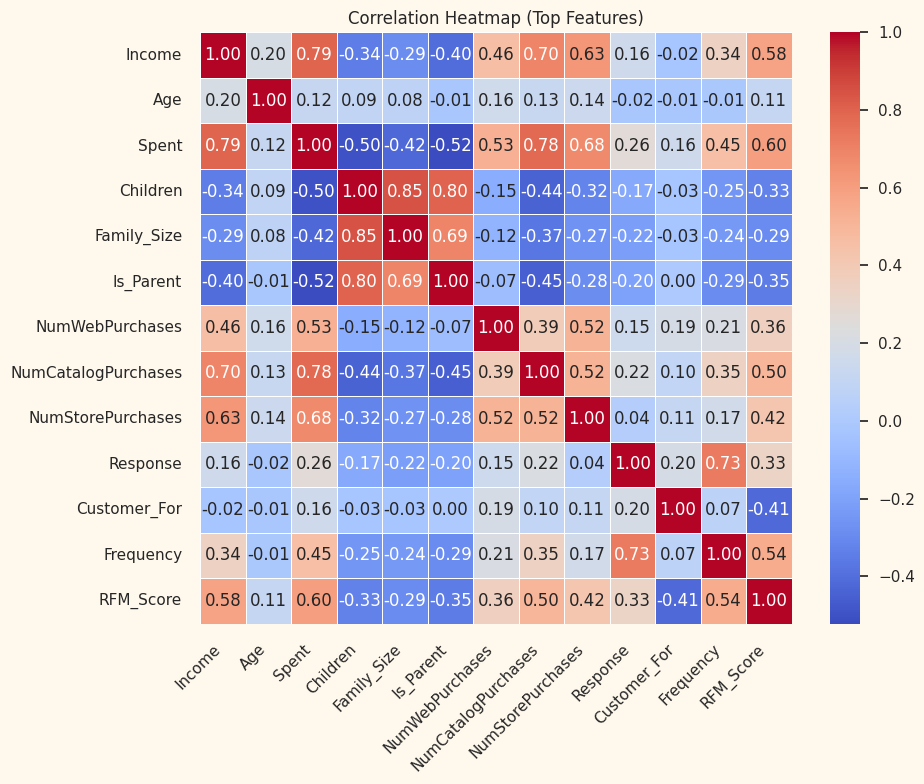

In [49]:
# Option 1: Focused Heatmap with selected features and annotations
top_features = [
    'Income', 'Age', 'Spent', 'Children', 'Family_Size', 'Is_Parent',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'Response', 'Customer_For', 'Frequency', 'RFM_Score'
]

corr_matrix = data[top_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)
plt.title("Correlation Heatmap (Top Features)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



*This heatmap reveals how key features correlate with each other. Notable positive correlations exist between:*
1.   *Income and Spent, suggesting higher earners spend more.*
1.   *Children and both Family_Size and Is_Parent, confirming sound feature engineering.*
2.   *Response has moderate correlations with Frequency, RFM_Score, and Spent, implying that higher-engaged or loyal customers are more likely to respond.*


*PCA Visualization (2D)*

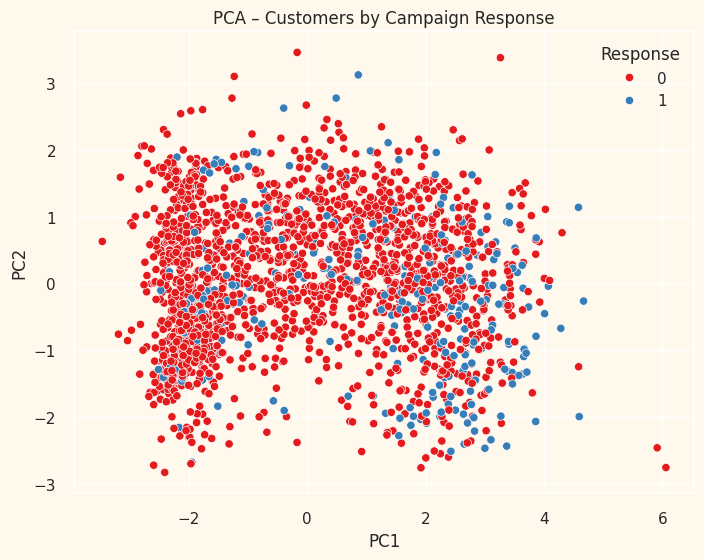

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Choose relevant features
pca_features = ['Income', 'Spent', 'Age', 'Children', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']
scaled = StandardScaler().fit_transform(data[pca_features])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=data['Response'], palette='Set1')
plt.title('PCA – Customers by Campaign Response')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


*This PCA plot reduces customer features to 2 dimensions to visualize separation by campaign response. While there's significant overlap between responders and non-responders, some spatial separation is visible.
This suggests that with better feature engineering or non-linear modeling, response prediction may improve. However, pure linear separability is limited — which aligns with low model recall.*

*Campaign Acceptance*

In [47]:
import plotly.graph_objects as go

funnel_counts = [
    data.shape[0],
    data['Response'].sum()
]

funnel_labels = ['Total Customers', 'Accepted Campaign']

fig = go.Figure(go.Funnel(
    y=funnel_labels,
    x=funnel_counts,
    textinfo="value+percent initial"
))
fig.update_layout(title="Campaign Funnel")
fig.show()


*The funnel shows a stark drop from total customers (2,212) to those who accepted the most recent campaign (333), equating to a ~15% conversion rate.
This highlights the challenge of campaign engagement and underlines the need for better targeting, personalization, or offer strategies to improve conversion.*

